Sampling Rate = 240Hz
Time for 1 intensification = 100 ms = 24 sample
Time for 1 Blank = 75ms = 18 sampley

In [3]:
from os.path import dirname, join as pjoin
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io 
import h5py
    
data_per_intensification = 240 #667 m-seconds
latency = 0 
channel = 10

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\BCI_Comp_III_Wads_2004.pdf
.\eloc64.txt
.\example.m
.\Subject_A_Test.mat
.\Subject_A_Train.mat
.\Subject_B_Test.mat
.\Subject_B_Train.mat
.\topoplotEEG.m
.\true_labels_a.txt
.\true_labels_b.txt
.\Week 2.ipynb
.\Week 3.ipynb
.\.ipynb_checkpoints\Week 2-checkpoint.ipynb
.\.ipynb_checkpoints\Week 3-checkpoint.ipynb


In [16]:
train_A = scipy.io.loadmat('Subject_A_Train.mat') 

In [17]:
train_A

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Nov 29 08:14:54 2004',
 '__version__': '1.0',
 '__globals__': [],
 'Signal': array([[[ 8.0849998e-02, -1.7930571e+01, -9.2669497e+00, ...,
          -1.9443050e+01, -1.0342620e+01, -1.4575340e+01],
         [-2.2476299e+00, -1.7676010e+01, -6.4597502e+00, ...,
          -1.7911850e+01, -8.0227804e+00, -1.3052780e+01],
         [ 7.5837302e+00, -1.4875850e+01, -3.3973501e+00, ...,
          -1.4083850e+01, -4.1563802e+00, -9.7538996e+00],
         ...,
         [-2.6567310e+01, -1.4366730e+01, -2.4068550e+01, ...,
           5.0561500e+00, -1.3210200e+00,  3.9491401e+00],
         [-2.1651630e+01, -1.2330250e+01, -2.0750950e+01, ...,
           9.7294998e-01, -2.0943000e+00,  1.1577801e+00],
         [-2.2169069e+01, -1.5130410e+01, -2.4068550e+01, ...,
          -1.3238500e+00, -4.6718998e+00, -1.6335800e+00]],
 
        [[ 1.5086610e+01,  1.1598390e+01,  1.2680250e+01, ...,
          -3.6206501e+00,  7.1850600e+00,

In [18]:
train_A['Signal'].shape

(85, 7794, 64)

In [19]:
train_A['StimulusCode'].shape

(85, 7794)

In [20]:
train_A['Flashing'].shape

(85, 7794)

In [21]:
train_A['Signal'][1][21:150]

array([[  8.87733,   7.27087,   7.57625, ...,  12.71215,  20.58858,
         11.05442],
       [ 12.75813,  12.87119,  14.21145, ...,  12.45695,  21.87738,
         10.5469 ],
       [ 13.27557,   9.56191,  11.40425, ...,   7.60815,  18.26874,
          6.23298],
       ...,
       [ -3.79995,  -7.49361,  -2.88695, ...,  -1.83425,  -7.76502,
         -1.12606],
       [ -2.50635,  -8.25729,  -3.65255, ...,  -5.66225, -10.60038,
         -4.42494],
       [ -1.98891,  -5.45713,  -3.90775, ...,  -7.44865, -14.20902,
         -4.6787 ]], dtype=float32)

In [22]:
train_A['Signal'][84]

array([[ -3.54123,   4.97983,   5.27945, ...,  -4.38625, -15.49782,
          3.44162],
       [ -3.79995,   4.72527,   4.76905, ...,  -7.70385, -16.78662,
          0.90402],
       [ -3.54123,   4.72527,   4.00345, ...,  -4.13105, -14.20902,
          3.44162],
       ...,
       [ 10.42965, -16.40321, -24.57895, ...,  15.51935,  39.92058,
         11.05442],
       [ 14.56917, -12.58481, -20.24055, ...,  17.56095,  41.46714,
         11.8157 ],
       [ 16.63893, -11.82113, -19.47495, ...,  16.54015,  38.37402,
          7.24802]], dtype=float32)

In [24]:
containsP300 = np.array([])
nonP300 = np.array([])

In [25]:
data_per_channel_per_round = np.zeros((85,15,12,data_per_intensification,64))
p300_per_channel_per_round = np.zeros((85,15,2,data_per_intensification,64))
non_p300_per_channel_per_round = np.zeros((85,15,10,data_per_intensification,64))
data_flattened = np.zeros((85*12*15,data_per_intensification,64))
p300_data_flattened = np.zeros((85*2*15,data_per_intensification,64))
non_p300_data_flattened = np.zeros((85*10*15,data_per_intensification,64))

In [26]:

for epoch in range(train_A['Signal'].shape[0]):
    round_increment = 0
    neutral_increment = 0
    p300_increment = 0
    non_p300_increment = 0
    i = 0
    while i < 7794:
        if(train_A['Flashing'][epoch][i]==1):

            if(train_A['StimulusType'][epoch][i]==1):
                #P300
                data_per_channel_per_round[epoch][round_increment][neutral_increment] = p300_per_channel_per_round[epoch][round_increment][p300_increment] = train_A['Signal'][epoch][(i+latency) : (i+latency+data_per_intensification)]
                p300_increment +=1
                p300_increment %= 2
            else:
                data_per_channel_per_round[epoch][round_increment][neutral_increment] = non_p300_per_channel_per_round[epoch][round_increment][non_p300_increment] = train_A['Signal'][epoch][(i+latency) : (i+latency+data_per_intensification)]
                non_p300_increment+=1
                non_p300_increment%=10   
        
            neutral_increment+=1
            if(neutral_increment>=12):
                neutral_increment%=12
                round_increment+=1
                round_increment%=15
                i+=24
        i+=1



In [27]:
average_p300_per_channel = np.zeros((85,15,data_per_intensification,64))
average_non_p300_per_channel = np.zeros((85,15,data_per_intensification,64))
for epoch in range(85):
    for i in range(15):
        average_p300_per_channel[epoch][i] = np.average(p300_per_channel_per_round[epoch][i],0)
        average_non_p300_per_channel[epoch][i] = np.average(non_p300_per_channel_per_round[epoch][i],0)            

In [28]:
average_p300_per_channel

array([[[[-4.44674990e+00, -1.83124099e+01, -4.80094993e+00, ...,
          -2.21704996e+00, -8.40942001e+00,  1.53842002e+00],
         [-1.34211001e+00, -1.19484100e+01, -2.37654996e+00, ...,
          -3.11025012e+00, -8.02277994e+00,  1.15778002e+00],
         [-6.51650989e+00, -1.60213704e+01, -4.29055011e+00, ...,
          -5.40705013e+00, -9.31157970e+00, -7.45420009e-01],
         ...,
         [-2.76506996e+00, -6.22080994e+00, -1.15637503e+01, ...,
           1.22017503e+01,  1.64322007e+00,  1.42264199e+01],
         [-1.77869976e-01, -1.12961002e+00, -9.01175022e+00, ...,
           1.07981501e+01, -1.61099993e-01,  1.25769796e+01],
         [ 1.11572999e+00, -4.05705018e+00, -1.00325503e+01, ...,
           1.25845499e+01,  2.28761999e+00,  1.39726596e+01]],

        [[-1.01385903e+01, -4.18432999e+00,  3.36545008e+00, ...,
          -8.85225010e+00,  1.05359397e+01, -1.06420603e+01],
         [-9.23306990e+00, -1.63872999e+00,  6.42785001e+00, ...,
          -5.02425003e

In [29]:
average_p300_per_channel_per_epoch = np.zeros((85,data_per_intensification,64))
average_non_p300_per_channel_per_epoch = np.zeros((85,data_per_intensification,64))

In [30]:
for epoch in range(85):
    average_p300_per_channel_per_epoch[epoch] = np.average(average_p300_per_channel[epoch],0)
    average_non_p300_per_channel_per_epoch[epoch] = np.average(average_non_p300_per_channel[epoch],0)

In [31]:
average_p300_per_channel_total = np.transpose(np.average(average_p300_per_channel_per_epoch,0))
average_non_p300_per_channel_total = np.transpose(np.average(average_non_p300_per_channel_per_epoch,0))
average_p300_per_channel_total[0].shape

(240,)

NameError: name 'p300_per_channel' is not defined

In [34]:
x = np.arange(240)
x.shape

(240,)

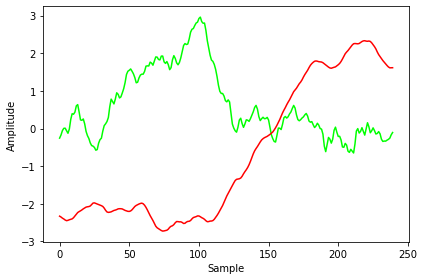

In [36]:
plt.plot(x,average_p300_per_channel_total[11],color='#00FF00',label='P300')
plt.plot(x,average_non_p300_per_channel_total[11],color='#FF0000',label='Non-P300')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
np.empty([85,15,12,240])

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [48]:
t = 0
s = np.array([],dtype = "int64")
for i in range(15*12):
    print(t)
    s = np.append(s,int(t))
    t+= 1/12+0.00000001   
print(s)
np.bincount(s)

0
0.08333334333333332
0.16666668666666665
0.25000003
0.3333333733333333
0.4166667166666666
0.50000006
0.5833334033333333
0.6666667466666666
0.7500000899999999
0.8333334333333332
0.9166667766666665
1.00000012
1.0833334633333334
1.1666668066666668
1.2500001500000002
1.3333334933333336
1.416666836666667
1.5000001800000005
1.5833335233333339
1.6666668666666673
1.7500002100000007
1.8333335533333341
1.9166668966666676
2.0000002400000008
2.083333583333334
2.1666669266666676
2.250000270000001
2.3333336133333344
2.416666956666668
2.5000003000000013
2.5833336433333347
2.666666986666668
2.7500003300000015
2.833333673333335
2.9166670166666684
3.000000360000002
3.0833337033333352
3.1666670466666687
3.250000390000002
3.3333337333333355
3.416667076666669
3.5000004200000023
3.5833337633333358
3.666667106666669
3.7500004500000026
3.833333793333336
3.9166671366666694
4.000000480000002
4.083333823333335
4.166667166666668
4.250000510000001
4.333333853333334
4.416667196666667
4.50000054
4.583333883333333
4

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype=int64)

In [41]:
a = """
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
15
""".strip().split("\n")

In [33]:
np.bincount(a)

array([11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
      dtype=int64)

In [50]:
np.zeros((1,2,3))

array([[[0., 0., 0.],
        [0., 0., 0.]]])

In [68]:
a = np.array([[2,7,2],[1,1,1]])
a[1]+= np.array([2,3,4])
a

array([[2, 7, 2],
       [3, 4, 5]])

In [52]:
a

array([1, 1, 1])

In [53]:
b

array([1, 1, 1])

In [54]:
a+b

array([2, 2, 2])

In [55]:
a+=b

In [56]:
a

array([2, 2, 2])

In [57]:
a/=23

TypeError: No loop matching the specified signature and casting was found for ufunc true_divide

In [58]:
a = a/23

In [59]:
a

array([0.08695652, 0.08695652, 0.08695652])